In [1]:
from scipy import stats
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
good_chains = stats.beta.rvs(2, 5, size=(2, 2000))
bad_chains0 = np.random.normal(
    np.sort(good_chains, axis=None), 0.05, size=4000
).reshape(2, -1)

bad_chains1 = good_chains.copy()
for i in np.random.randint(1900, size=4):
    bad_chains1[i % 2 :, i : i + 100] = np.random.beta(i, 950, size=100)

chains = {
    "good_chains": good_chains,
    "bad_chains0": bad_chains0,
    "bad_chains1": bad_chains1,
}

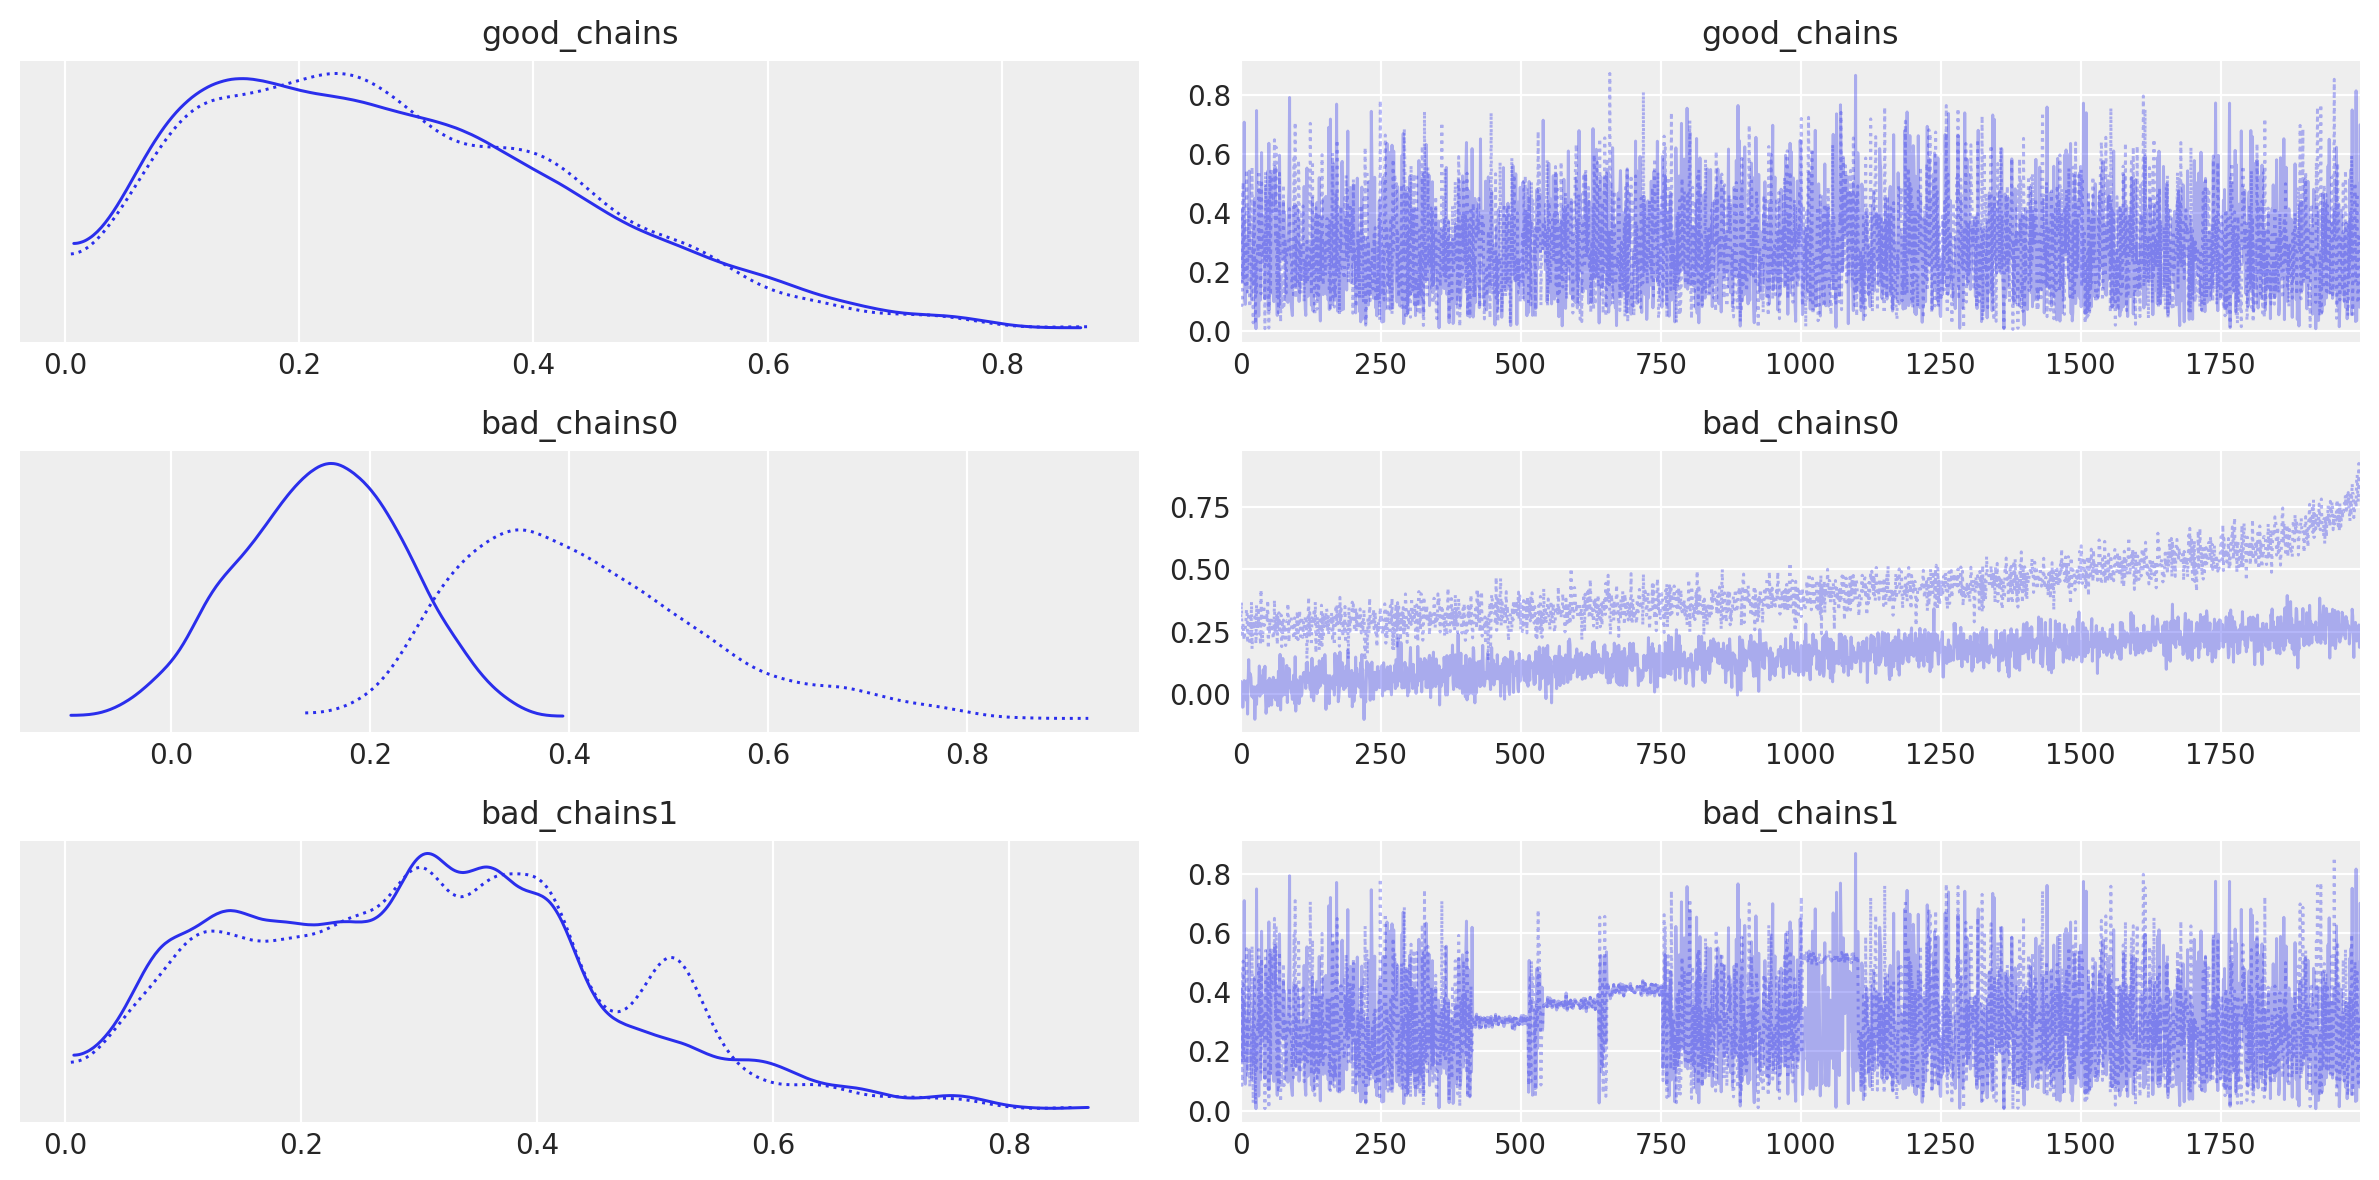

In [4]:
_ = az.plot_trace(chains)
plt.tight_layout()

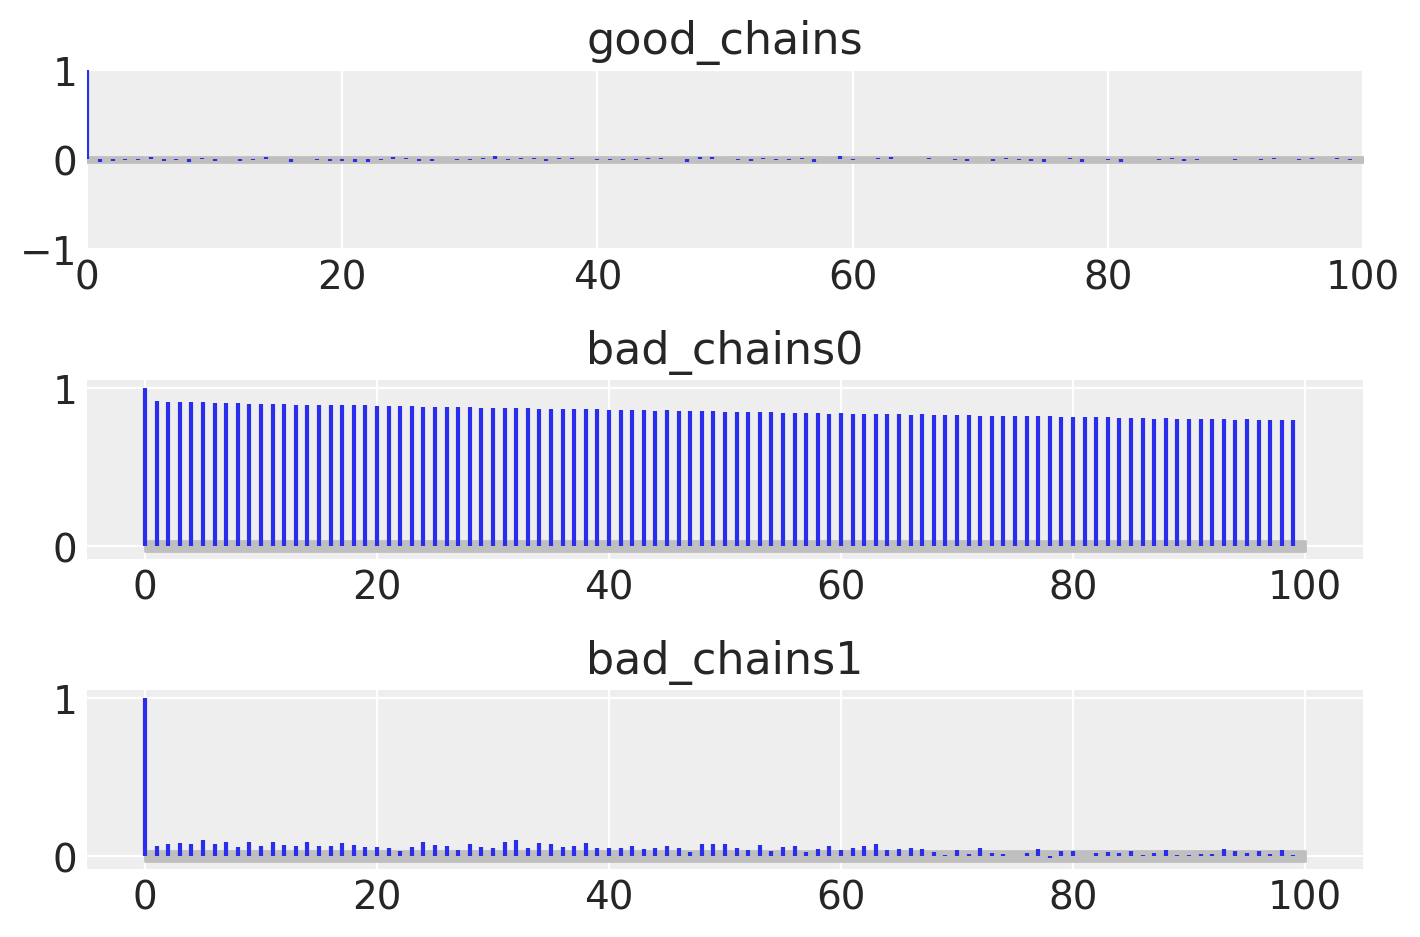

In [5]:
fig, ax = plt.subplots(3, 1)  
az.plot_autocorr(chains, combined=True, ax=ax)
plt.tight_layout()

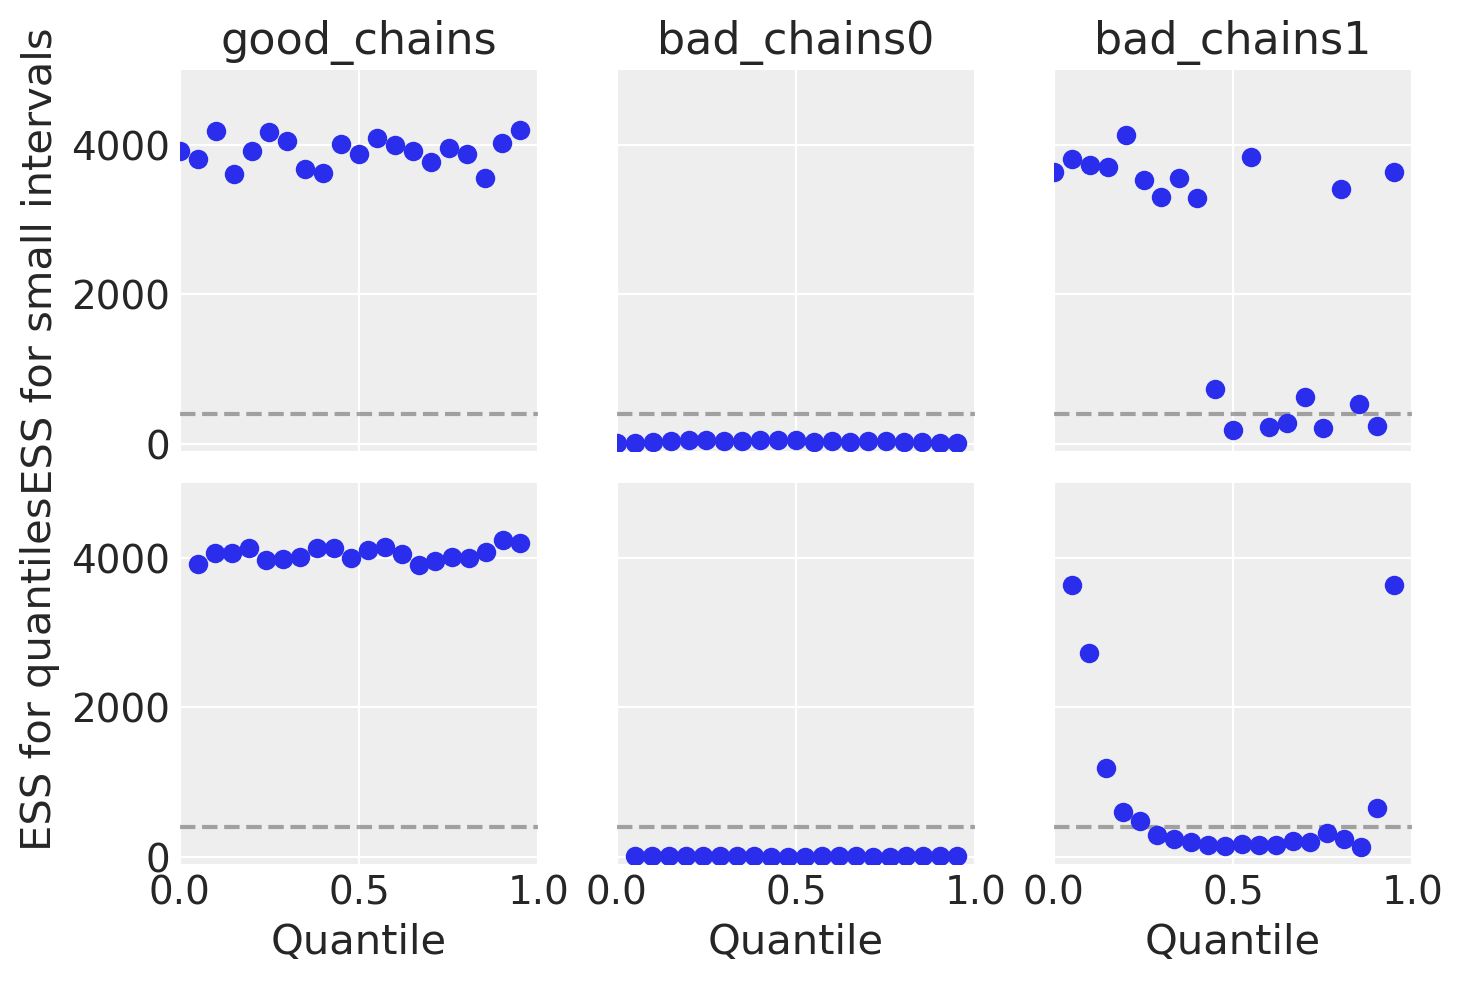

In [6]:
_, axes = plt.subplots(2, 3, sharey=True, sharex=True)
az.plot_ess(chains, kind="local", ax=axes[0])
az.plot_ess(chains, kind="quantile", ax=axes[1])

for ax_ in axes[0]:
    ax_.set_xlabel("")
for ax_ in axes[1]:
    ax_.set_title("")

for ax_ in axes[:, 1:].ravel():
    ax_.set_ylabel("")
plt.ylim(-100, 5000);

In [7]:
az.rhat(chains)

<xarray.Dataset>
Dimensions:      ()
Data variables:
    good_chains  float64 1.0
    bad_chains0  float64 2.429
    bad_chains1  float64 1.019

In [8]:
az.mcse(chains)

<xarray.Dataset>
Dimensions:      ()
Data variables:
    good_chains  float64 0.002484
    bad_chains0  float64 0.1103
    bad_chains1  float64 0.007572

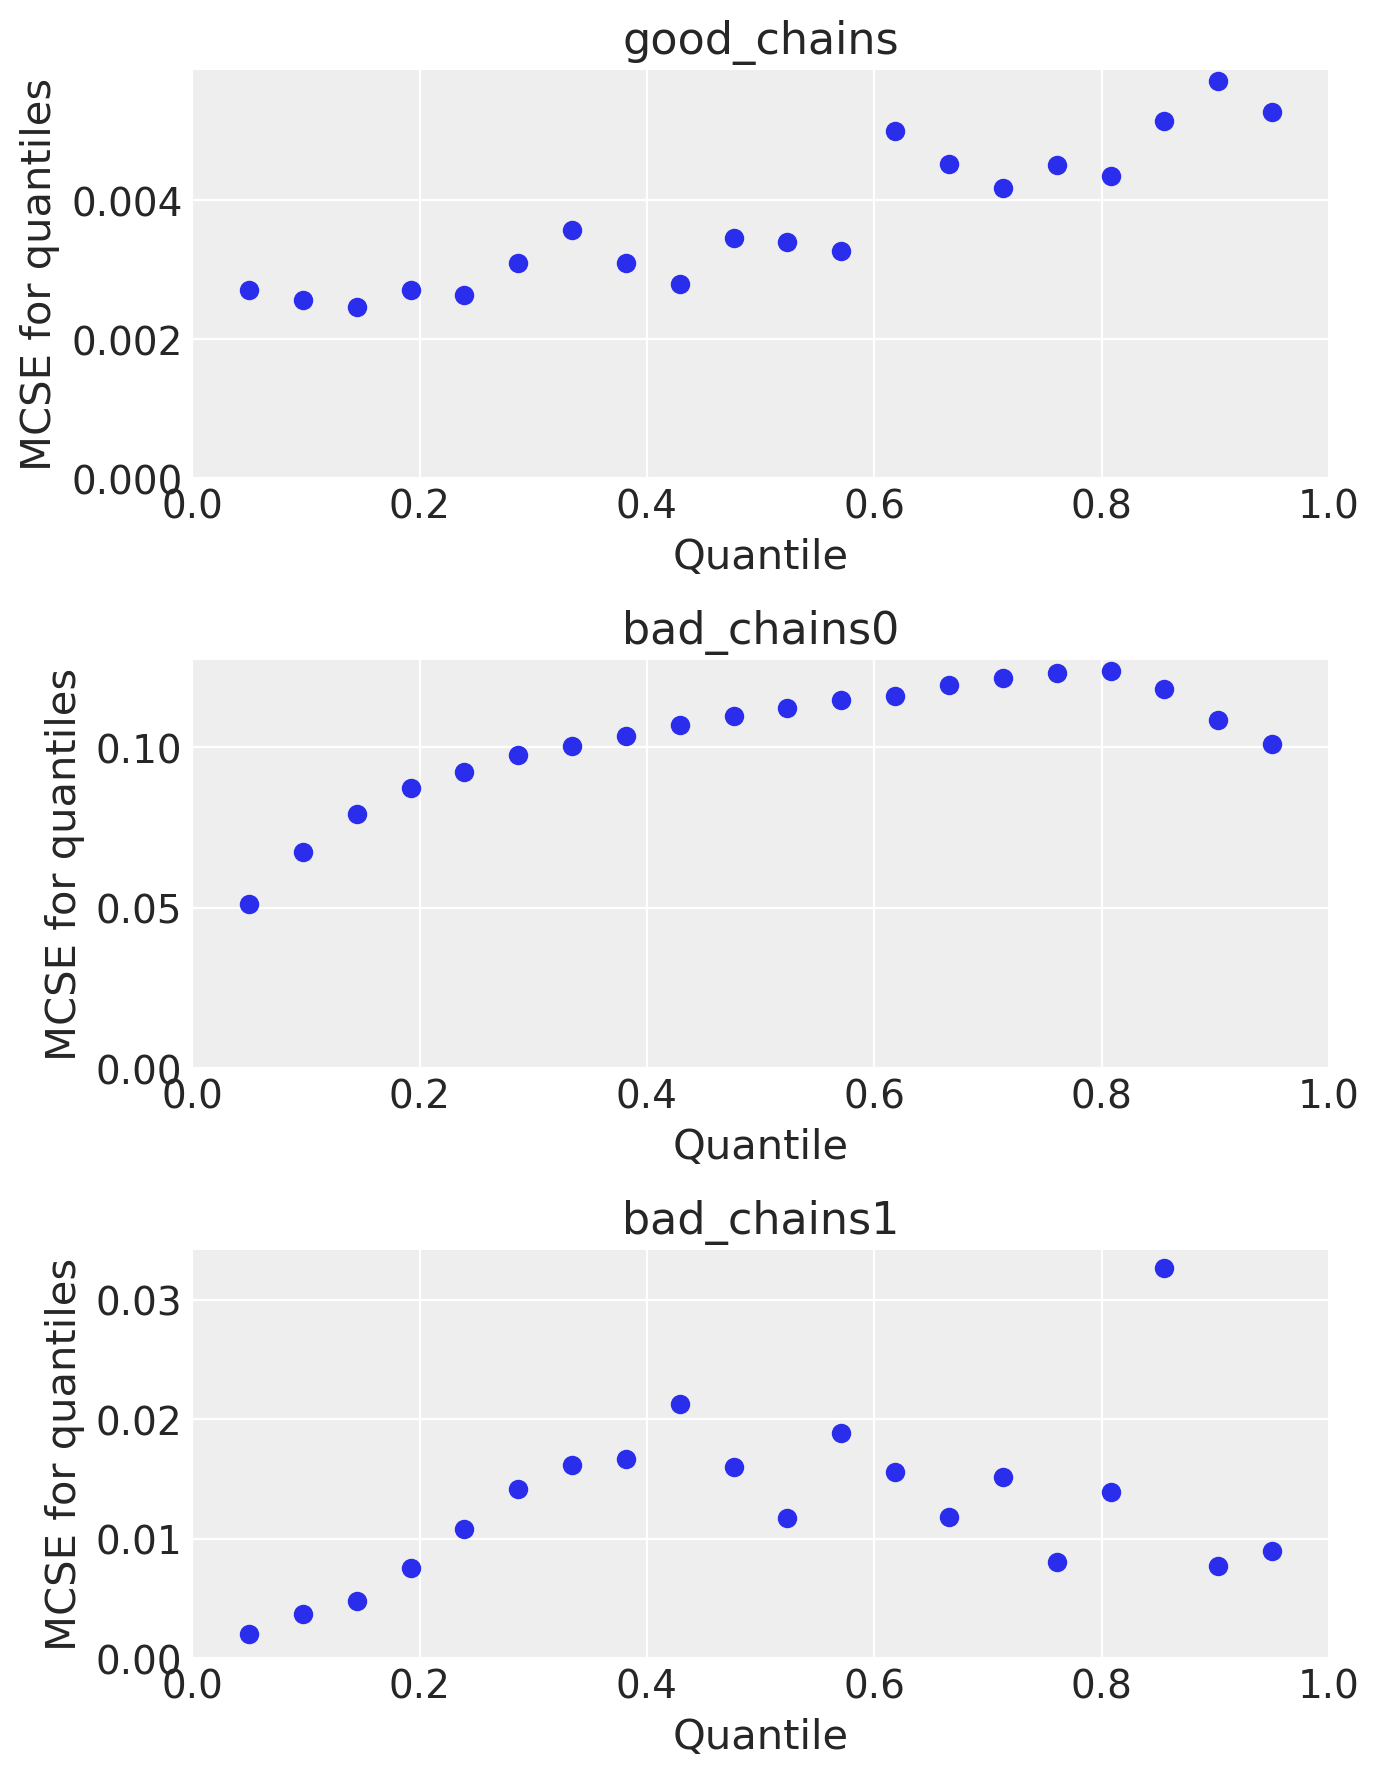

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(7, 9))  
az.plot_mcse(chains, ax=ax)
plt.tight_layout()

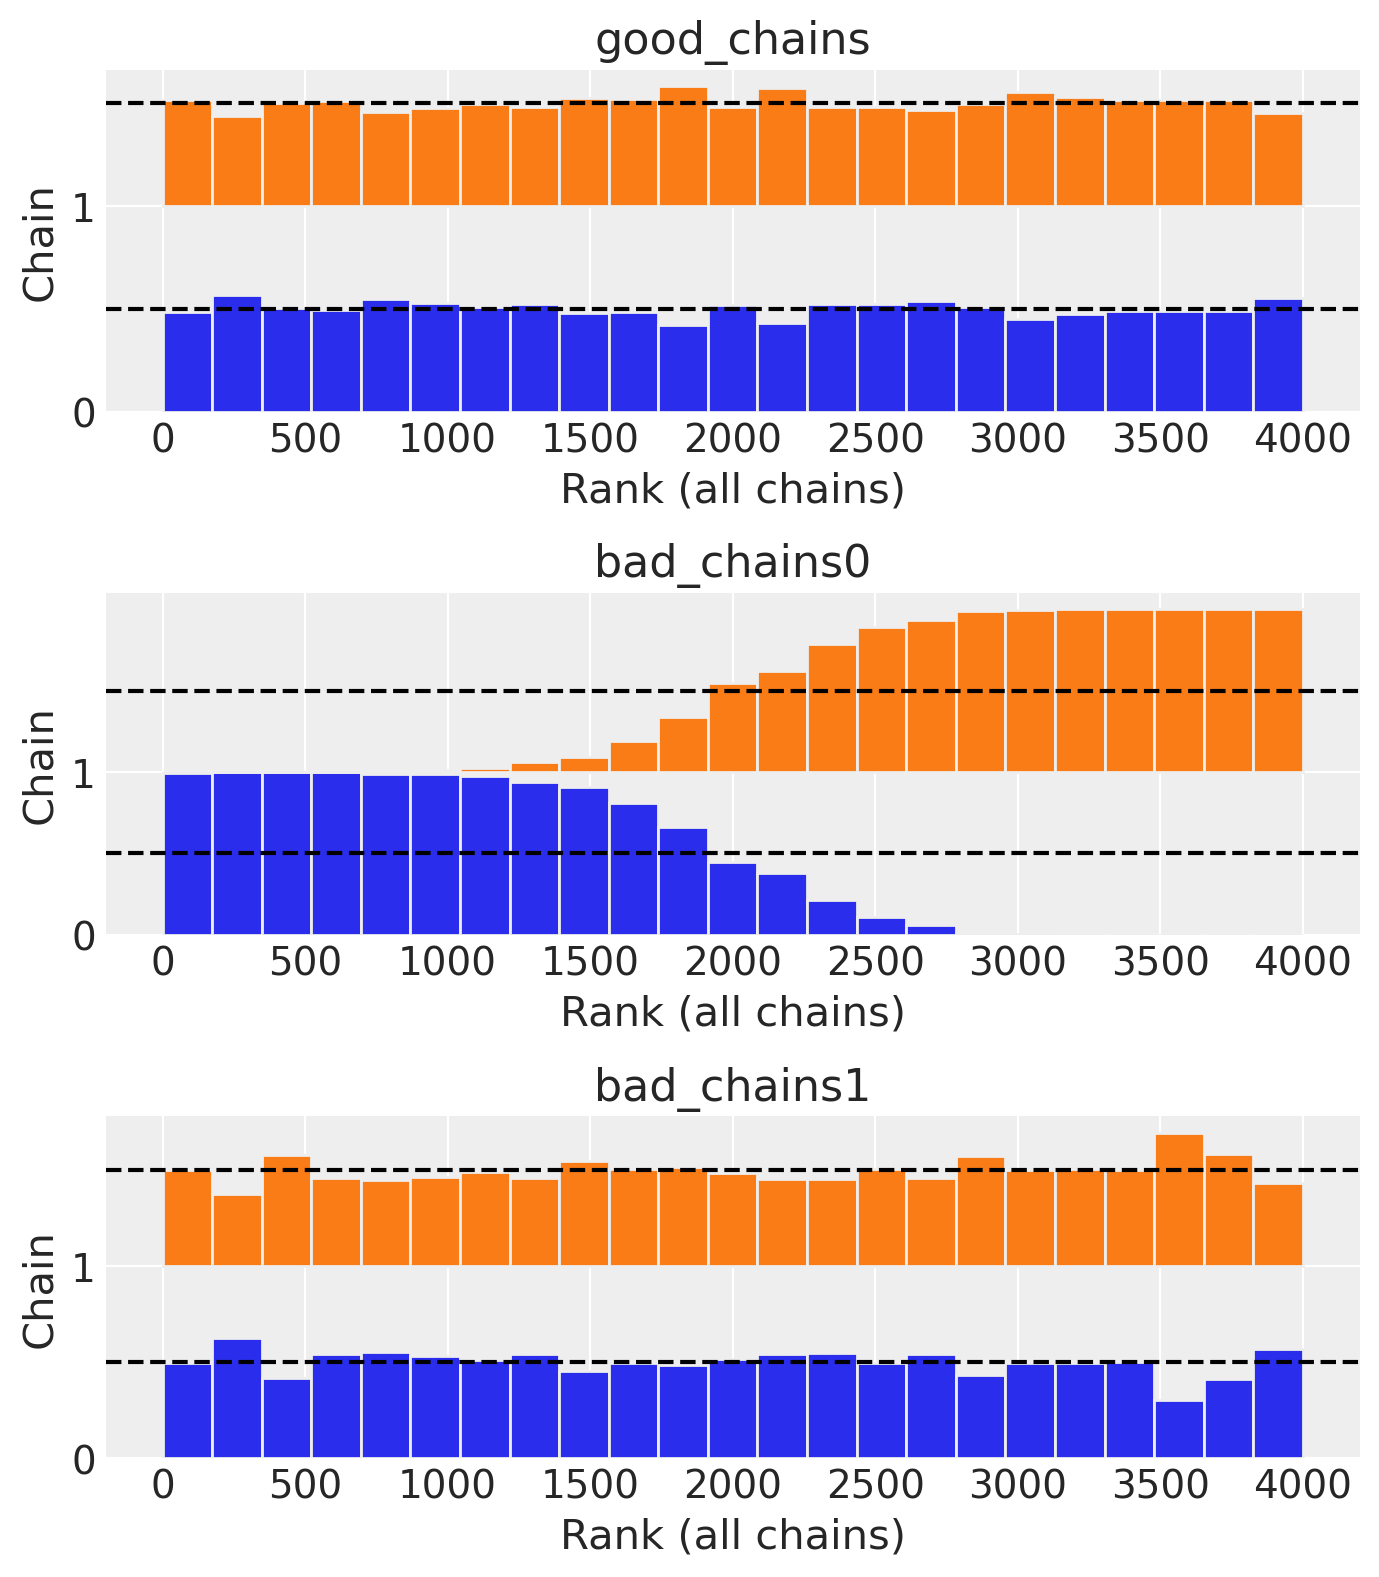

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(7, 8))  
az.plot_rank(chains, kind="bars", ax=ax)
plt.tight_layout()

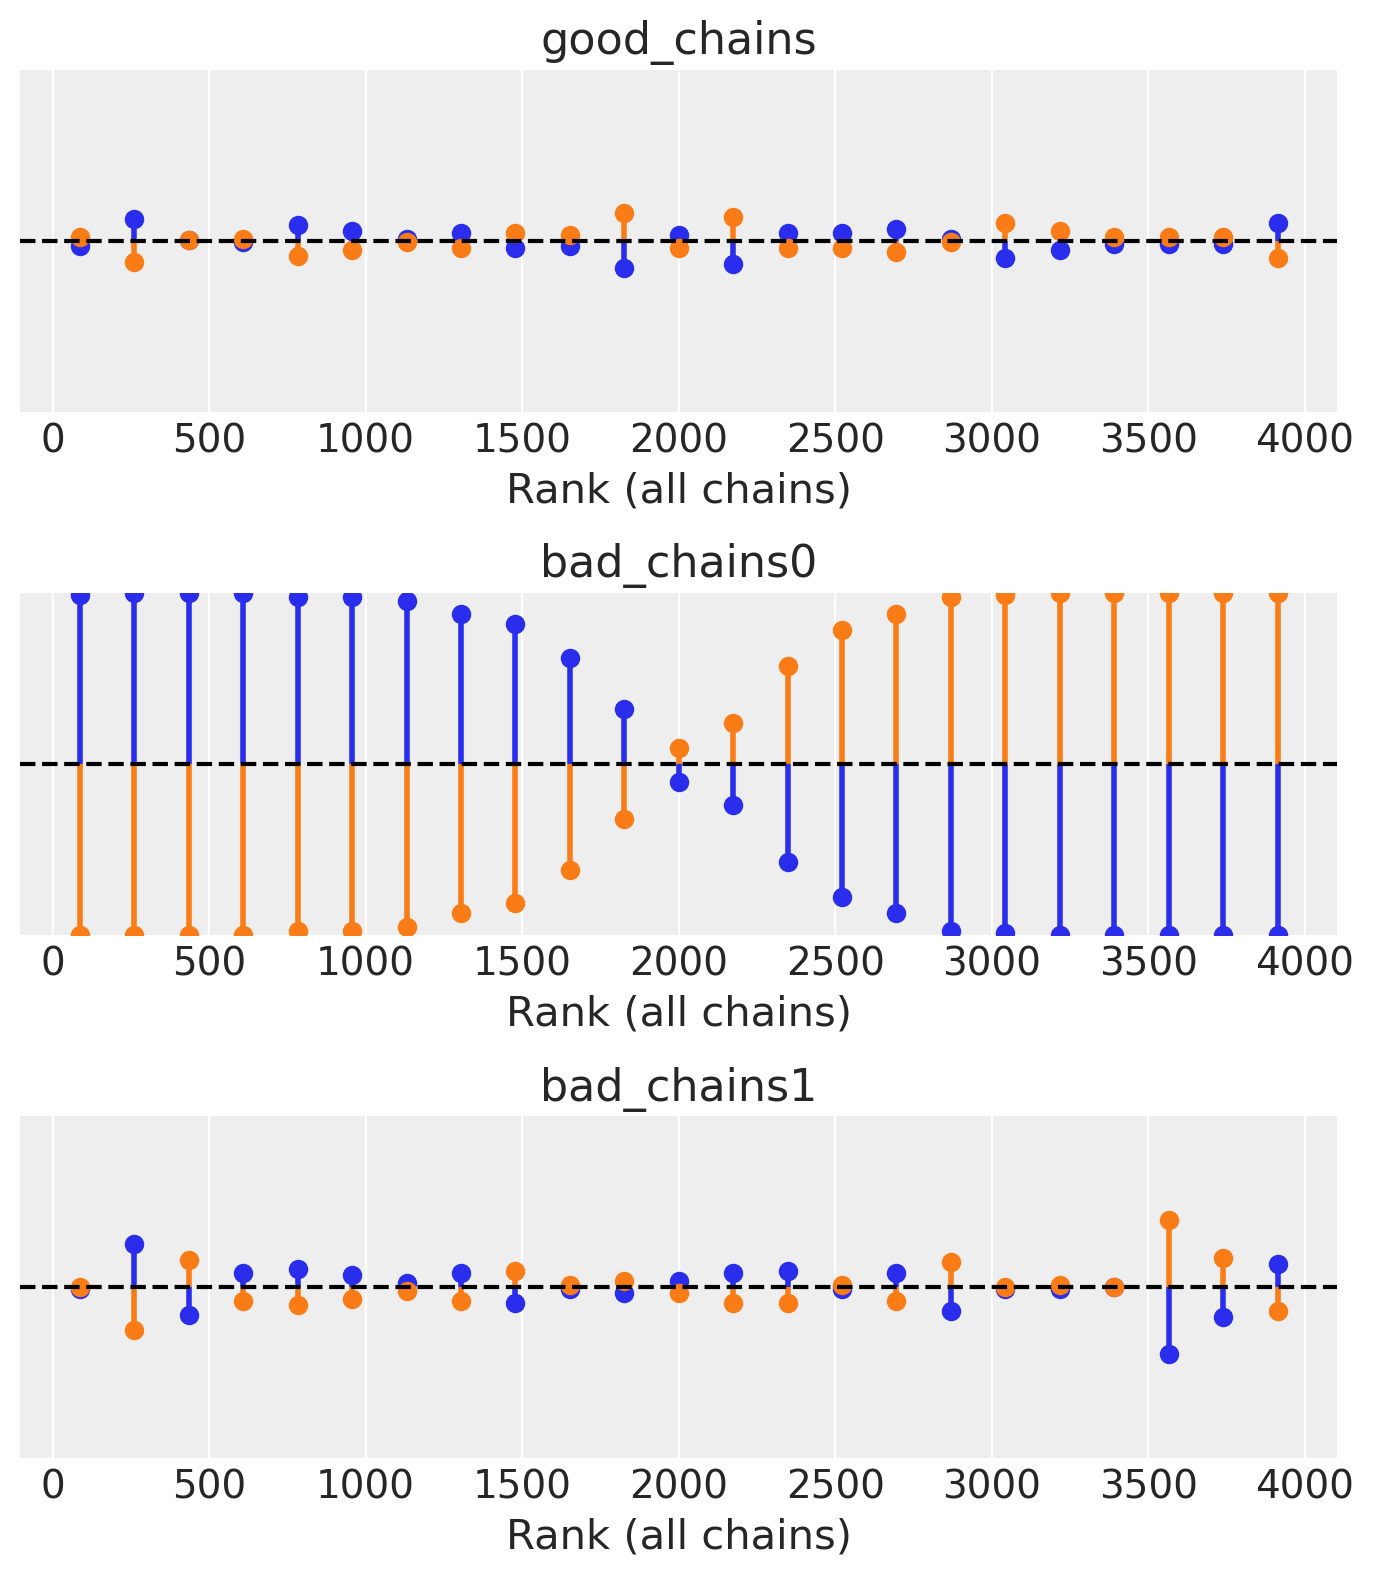

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(7, 8))  
az.plot_rank(chains, kind="vlines", ax=ax)
plt.tight_layout()

In [12]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Wed Nov 15 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.17.2

arviz     : 0.16.1
matplotlib: 3.8.1
seaborn   : 0.13.0
scipy     : 1.11.3
numpy     : 1.25.2
pymc      : 5.9.2

Watermark: 2.4.3

